https://lms.mipt.ru/mod/quiz/view.php?id=154321

## 1 задание

Будем работать с [датасетом](https://drive.google.com/file/d/19nU896B7Eqg-lg3fozeY7X0DgJK7AcZa) музыкальных композиций с предыдущего практического задания, где уже обработаны категориальные переменные.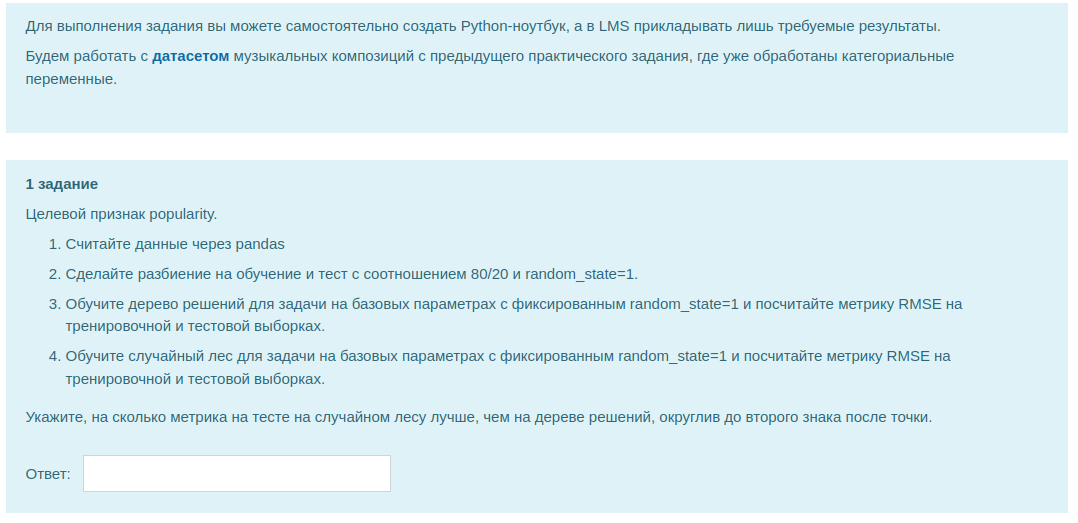

In [ ]:
!wget 'https://drive.google.com/uc?id=19nU896B7Eqg-lg3fozeY7X0DgJK7AcZa' -O music.csv

--2024-10-14 07:51:09--  https://drive.google.com/uc?id=19nU896B7Eqg-lg3fozeY7X0DgJK7AcZa
Resolving drive.google.com (drive.google.com)... 74.125.201.102, 74.125.201.101, 74.125.201.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.201.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=19nU896B7Eqg-lg3fozeY7X0DgJK7AcZa [following]
--2024-10-14 07:51:09--  https://drive.usercontent.google.com/download?id=19nU896B7Eqg-lg3fozeY7X0DgJK7AcZa
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.121.132, 2607:f8b0:4001:c19::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.121.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 418838 (409K) [application/octet-stream]
Saving to: ‘music.csv’

music.csv           100%[===================>] 409.02K  --.-KB/s    in 0.01s   

2024-10-14 07:51:11 (27.6 MB/s) - ‘

In [ ]:
import pandas as pd

df = pd.read_csv('music.csv')
print(df.shape)
df.head()

(5000, 16)


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,77,230613,False,0.509,0.448,4,-7.552,0,0.0357,0.00713,0.013700,0.2440,0.221,156.909,3,0.0
1,79,208760,False,0.636,0.676,2,-3.442,1,0.0263,0.08070,0.000000,0.0831,0.273,113.980,4,0.0
2,76,180690,False,0.573,0.539,2,-6.091,0,0.0322,0.01620,0.000012,0.1050,0.390,75.012,4,0.0
3,84,232106,False,0.743,0.446,4,-7.807,0,0.0683,0.00390,0.118000,0.3370,0.278,123.596,4,0.0
4,76,225026,False,0.572,0.214,7,-15.625,1,0.0293,0.64900,0.129000,0.1250,0.485,95.542,4,0.0


In [ ]:
from sklearn.model_selection import train_test_split

target = 'popularity'

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=target),
                                                    df[target],
                                                    test_size=0.2,
                                                    random_state=1)

X_train.shape, X_test.shape

((4000, 15), (1000, 15))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


model_dt = DecisionTreeRegressor(random_state=1)
model_dt.fit(X_train, y_train)

train_preds_dt = model_dt.predict(X_train)
test_preds_dt = model_dt.predict(X_test)

train_rmse_dt = mean_squared_error(y_train, train_preds_dt, squared=False)
test_rmse_dt = mean_squared_error(y_test, test_preds_dt, squared=False)

train_rmse_dt, test_rmse_dt

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(4.501354464624463, 29.700319451538643)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=1)
model_rf.fit(X_train, y_train)


train_preds_rf = model_rf.predict(X_train)
test_preds_rf = model_rf.predict(X_test)

train_rmse_rf = mean_squared_error(y_train, train_preds_rf, squared=False)
test_rmse_rf = mean_squared_error(y_test, test_preds_rf, squared=False)

train_rmse_rf, test_rmse_rf

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(9.167082947577512, 22.691988372811892)

Укажите, на сколько метрика на тесте на случайном лесу лучше, чем на дереве решений, округлив до второго знака после точки.

In [ ]:
round(test_rmse_dt - test_rmse_rf, 2)

7.01

## 2 задание

Продолжайте работать с [датасетом](https://drive.google.com/file/d/19nU896B7Eqg-lg3fozeY7X0DgJK7AcZa) музыкальных композиций с предыдущего задания.

У модели случайный лес оставьте параметр random_state=1. Измените глубину деревьев от 1 до 50 с шагом 3.

Визуализируйте изменение ошибки RMSE на тренировочной и тестовой выборках от параметра глубины.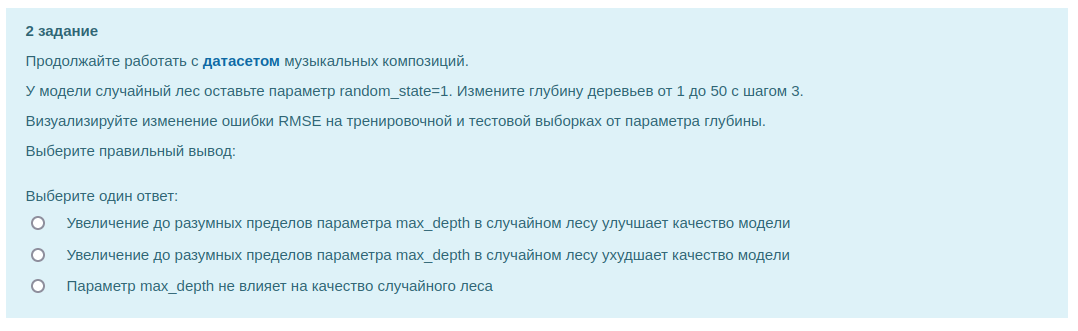

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

train_errors = []
test_errors = []

depths = range(1, 50, 3)
for depth in tqdm(depths):
    model = RandomForestRegressor(
        max_depth=depth,
        random_state=1)

    model.fit(X_train, y_train)

    test_preds = model.predict(X_test)
    train_preds = model.predict(X_train)

    rmse_train = mean_squared_error(y_train, train_preds, squared=False)
    rmse_test = mean_squared_error(y_test, test_preds, squared=False)
    test_errors.append(rmse_test)
    train_errors.append(rmse_train)

  0%|          | 0/17 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
  6%|▌         | 1/17 [00:02<00:40,  2.50s/it]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and wi

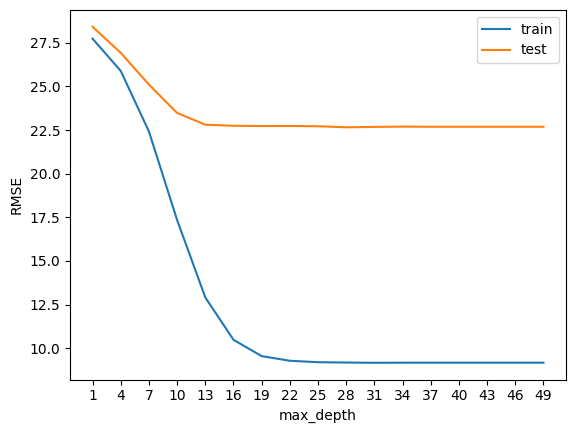

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


plt.plot(train_errors, label='train')
plt.plot(test_errors, label='test')
plt.xticks(np.arange(len(depths)), depths)
plt.ylabel('RMSE')
plt.xlabel('max_depth')
plt.legend();

## 3 задание

Продолжайте работать с [датасетом](https://drive.google.com/file/d/19nU896B7Eqg-lg3fozeY7X0DgJK7AcZa) музыкальных композиций с предыдущего задания.



Давайте снова перейдем к задаче бинарной классификации (популярная песня/не популярная песня), для этого нужно перевести целевой признак `popularity` в бинарный вид:
- Если признак `popularity` больше 50 - 1 класс
- Если признак `popularity` меньше или равен 50 - 0 класс

Работайте с выборками после разбиения на обучение и тест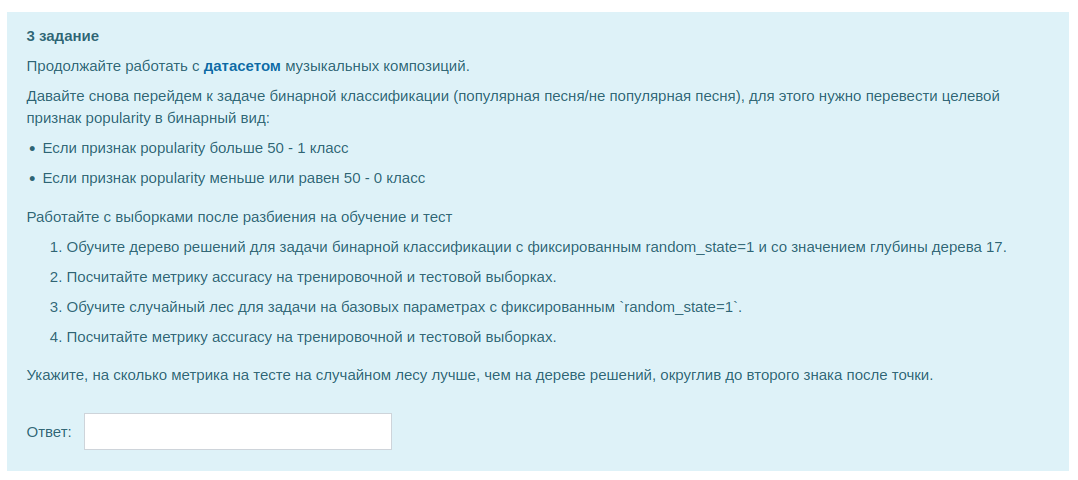

In [ ]:
import numpy as np

y_train_bin = np.zeros_like(y_train)
y_train_bin[y_train > 50] = 1

y_train_bin = pd.Series(y_train_bin)
y_train_bin.value_counts()

,count
0,2373
1,1627


In [ ]:
y_test_bin = np.zeros_like(y_test)
y_test_bin[y_test > 50] = 1

y_test_bin = pd.Series(y_test_bin)
y_test_bin.value_counts()

,count
0,599
1,401


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error


model_dt = DecisionTreeClassifier(max_depth=17, random_state=1)
model_dt.fit(X_train, y_train_bin)

train_acc_dt = model_dt.score(X_train, y_train_bin)
test_acc_dt = model_dt.score(X_test, y_test_bin)

train_acc_dt, test_acc_dt

(0.9805, 0.698)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(X_train, y_train_bin)


train_acc_rf = model_rf.score(X_train, y_train_bin)
test_acc_rf = model_rf.score(X_test, y_test_bin)

train_acc_rf, test_acc_rf

(0.9935, 0.777)

Укажите, на сколько метрика на тесте на случайном лесу лучше, чем на дереве решений, округлив до второго знака после точки.

In [ ]:
round(test_acc_rf - test_acc_dt, 2)

0.08

## 4 задание

Продолжайте работать с [датасетом](https://drive.google.com/file/d/19nU896B7Eqg-lg3fozeY7X0DgJK7AcZa) музыкальных композиций с предыдущего задания.


У модели случайный лес оставьте параметр random_state=1. Измените количество деревьев от 1 до 150 с шагом 10.

Визуализируйте изменение метрики accuracy на тренировочной и тестовой выборках от параметра количества моделей.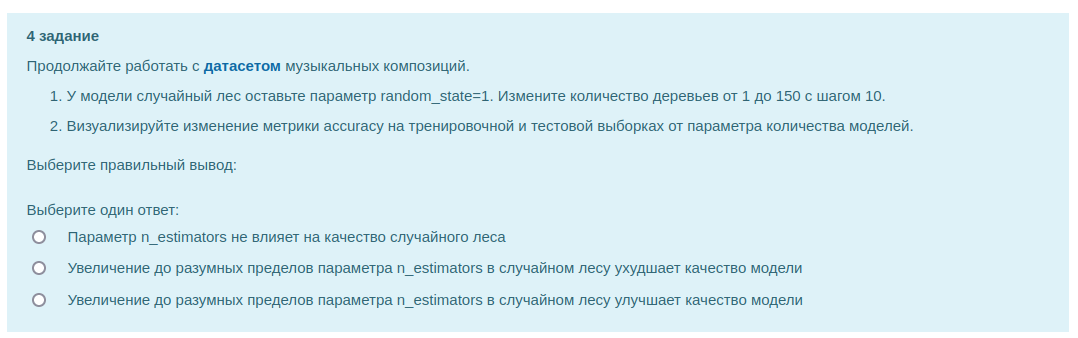

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

train_metrics = []
test_metrics = []

n_ests = range(1, 150, 10)
for n in tqdm(n_ests):
    model = RandomForestClassifier(
        n_estimators=n,
        random_state=1)

    model.fit(X_train, y_train_bin)

    test_acc = model.score(X_test, y_test_bin)
    train_acc = model.score(X_train, y_train_bin)

    test_metrics.append(test_acc)
    train_metrics.append(train_acc)

100%|██████████| 15/15 [00:14<00:00,  1.04it/s]


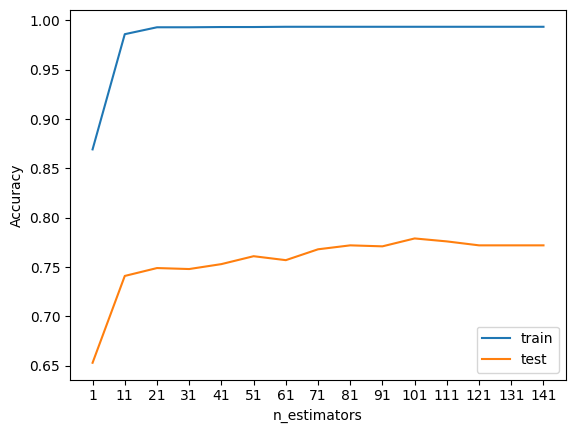

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


plt.plot(train_metrics, label='train')
plt.plot(test_metrics, label='test')
plt.xticks(np.arange(len(n_ests)), n_ests)
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
plt.legend();

## 5 задание

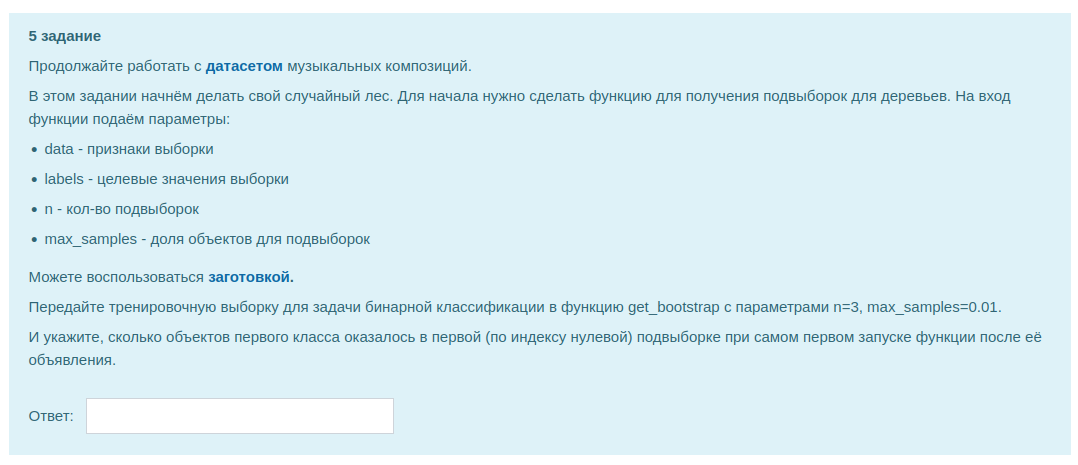



В этом задании начнём делать свой случайный лес. Для начала нужно сделать функцию для получения подвыборок для деревьев.
На вход функции подаём параметры:
- data - признаки выборки
- labels - целевые значения выборки
- n - кол-во подвыборок
- max_samples - доля объектов для подвыборок

Можете воспользоваться заготовкой:
```
np.random.seed(42)  # для фиксации случайности

def get_bootstrap(data, labels, n=100, max_samples=1.0):
    if isinstance(data, pd.DataFrame):  
        data = data.copy().values  # перевод таблицы в numpy array

    if isinstance(labels, pd.DataFrame) or isinstance(labels, pd.Series):
        labels = labels.copy().values  # перевод целевого признака в numpy array

    n_samples = ...  # подсчет кол-ва объектов в подвыборках
    bootstrap = []  # список для будущих подвыборок
    
    for i in range(n):
        
        sample_index = ...  # взятие случайных индексов в кол-ве n_samples
        b_data = ...  # взятие объектов по выбранным индексам
        b_labels = ...  # взятие целевых значений по выбранным индексам
        
        bootstrap.append((b_data, b_labels))  # добавление в список подвыборок
        
    return bootstrap
```


Пример работы функции на данных из двух признаков на первом запуске:
```
sample_X = np.array([
    [0, 0],
    [1, 1],
    [2, 2]
])

sample_y = np.array([0, 1, 2])

get_bootstrap(sample_X, sample_y, n=3, max_samples=1.0)
```

Output:
```
[(array([[2, 2],
         [0, 0],
         [2, 2]]),
  array([2, 0, 2])),
 (array([[2, 2],
         [0, 0],
         [0, 0]]),
  array([2, 0, 0])),
 (array([[2, 2],
         [1, 1],
         [2, 2]]),
  array([2, 1, 2]))]
```

In [ ]:
np.random.seed(42)  # для фиксации случайности

def get_bootstrap(data, labels, n=100, max_samples=1.0):
    if isinstance(data, pd.DataFrame):
        data = data.copy().values  # перевод таблицы в numpy array

    if isinstance(labels, pd.DataFrame) or isinstance(labels, pd.Series):
        labels = labels.copy().values  # перевод целевого признака в numpy array

    n_samples = int(max_samples * data.shape[0])  # подсчет кол-ва объектов в подвыборках
    bootstrap = []  # список для будущих подвыборок

    for i in range(n):

        sample_index = np.random.randint(0, n_samples, size=n_samples)  # взятие случайных индексов в кол-ве n_samples
        b_data = data[sample_index]  # взятие объектов по выбранным индексам
        b_labels = labels[sample_index]  # взятие целевых значений по выбранным индексам

        bootstrap.append((b_data, b_labels))  # добавление в список подвыборок

    return bootstrap

Передайте тренировочную выборку для задачи бинарной классификации в функцию get_bootstrap с параметрами n=3, max_samples=0.01.

И укажите, сколько объектов первого класса оказалось в первой (по индексу нулевой) подвыборке при самом первом запуске функции после её объявления.

In [ ]:
data = get_bootstrap(X_train, y_train_bin, n=3, max_samples=0.01)
np.unique(data[0][1], return_counts=True)

(array([0, 1]), array([28, 12]))

## 6 задание

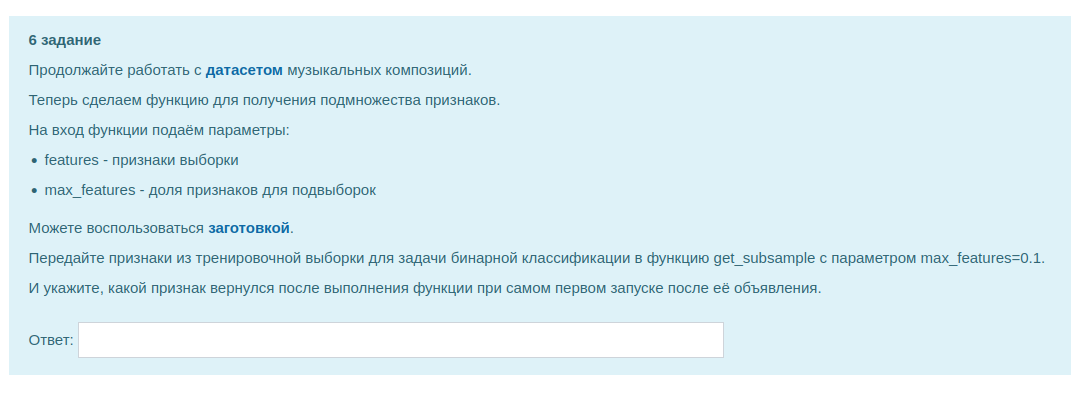




Теперь сделаем функцию для получения подмножества признаков.

На вход функции подаём параметры:

- features - признаки выборки
- max_features - доля признаков для подвыборок

Можете воспользоваться заготовкой:
```
np.random.seed(42)  # для фиксации случайности


def get_subsample(features, max_features=1.0):
    if not isinstance(features, np.ndarray):
        features = np.array(features.copy())  # перевод признаков в numpy array

    len_features = ...  # подсчет кол-ва признаков в подвыборках
    sample_indexes = list(range(len(features)))  # получение списка индексов признаков

    subsample = np.random.choice(  # взятие случайных индексов признаков
        ...,
        size=...,  # в кол-ве len_features
        replace=...  # без повторений
    )

    return features[subsample]  # на список выходе признаки
```


Пример работы функции на данных из трех признаков на первом запуске:

```
sample_features = ['f1', 'f2', 'f3']
print(get_subsample(sample_features, max_features=0.5))
print(get_subsample(sample_features, max_features=0.8))
```
Output:

```
['f1']
['f2' 'f3']
```

In [ ]:
np.random.seed(42)  # для фиксации случайности

def get_subsample(features, max_features=1.0):
    if not isinstance(features, np.ndarray):
        features = np.array(features.copy())  # перевод признаков в numpy array

    len_features = int(len(features) * max_features)  # подсчет кол-ва признаков в подвыборках
    sample_indexes = list(range(len(features)))  # получение списка индексов признаков

    subsample = np.random.choice(  # взятие случайныйх индексов признаков
        sample_indexes,
        size=len_features,  # в кол-ве len_features
        replace=False  # без повторений
    )

    return features[subsample]  # на список выходе признаки

Передайте признаки из тренировочной выборки для задачи бинарной классификации в функцию get_subsample с параметром max_features=0.1.

И укажите, какой признак вернулся после выполнения функции при самом первом запуске после её объявления.

In [ ]:
get_subsample(X_train.columns, max_features=0.1)

array(['instrumentalness'], dtype=object)

## 7 задание

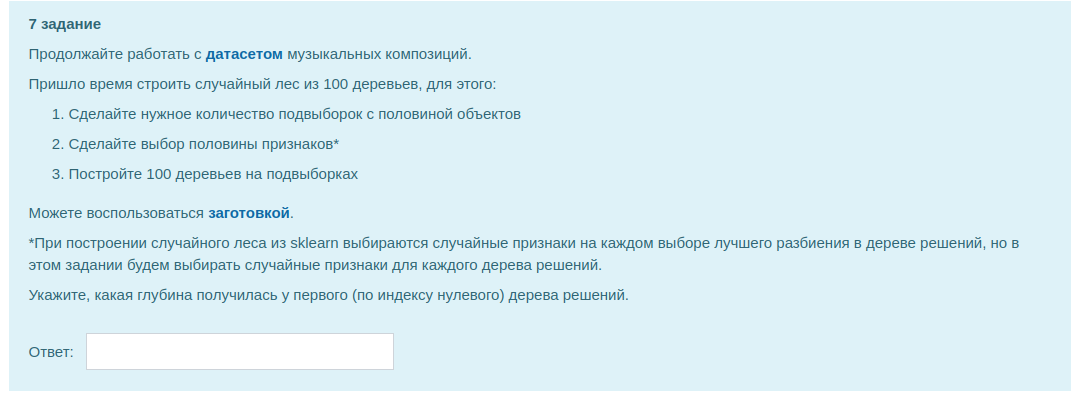


Можете воспользоваться заготовкой:
```
np.random.seed(42)  # для фиксации случайности

forest = []
bootstrap = ...  # получаем подвыборки

for b_data, b_labels in bootstrap:
    b_data = pd.DataFrame(b_data, columns=X_train.columns)  
    features = ...  # получаем признаки

    dt = DecisionTreeClassifier(random_state=1).fit(b_data[features], b_labels)
    forest.append(dt)

forest
```

*При построении случайного леса из `sklearn` выбираются случайные признаки на каждом выборе лучшего разбиения в дереве решений, но в этом задании будем выбирать случайные признаки для каждого дерева решений

In [ ]:
np.random.seed(42)  # для фиксации случайности

forest = []
bootstrap = get_bootstrap(X_train, y_train_bin, n=100, max_samples=0.5)  # получаем подвыборки

for b_data, b_labels in bootstrap:
    b_data = pd.DataFrame(b_data, columns=X_train.columns)
    features = get_subsample(X_train.columns, max_features=0.5)  # получаем признаки

    dt = DecisionTreeClassifier(random_state=1).fit(b_data[features], b_labels)
    forest.append(dt)

len(forest)

100

Укажите, какая глубина получилась у первого (по индексу нулевого) дерева решений

In [ ]:
forest[0].get_depth()

20

## 8 задание

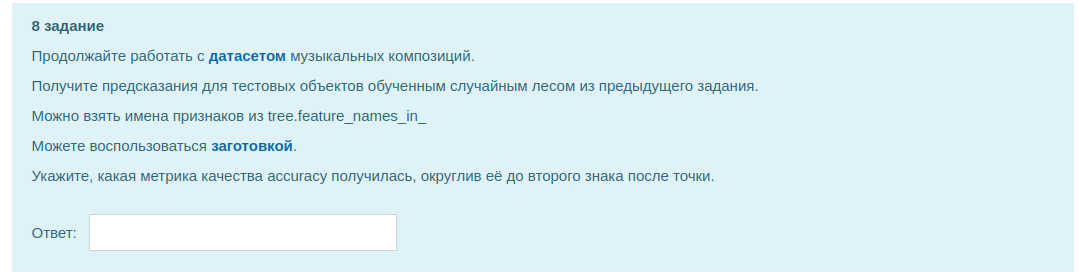


Можете воспользоваться заготовкой:
```
# добавим предсказания всех деревьев в список
predictions = []
for tree in forest:
    predictions.append(...)

# сформируем список с предсказаниями для каждого объекта
predictions_per_object = list(zip(*predictions))


# выберем в качестве итогового предсказания для каждого объекта тот класс,
# за который проголосовало большинство деревьев
voted_predictions = []
for obj in predictions_per_object:
    voted_predictions.append(...)

```

In [ ]:
# добавим предсказания всех деревьев в список
predictions = []
for tree in forest:
    predictions.append(tree.predict(X_test[tree.feature_names_in_]))

# сформируем список с предсказаниями для каждого объекта
predictions_per_object = list(zip(*predictions))


# выберем в качестве итогового предсказания для каждого объекта тот класс,
# за который проголосовало большинство деревьев
voted_predictions = []
for obj in predictions_per_object:
    voted_predictions.append(max(set(obj), key=obj.count))

len(voted_predictions)

1000

Укажите, какая метрика качества accuracy получилась, округлив её до второго знака после точки

In [ ]:
from sklearn.metrics import accuracy_score

round(accuracy_score(voted_predictions, y_test_bin), 2)

0.72